# Analysis of Motor Vehicle Collisions – Person Dataset

Project Members:

Batoul Srour Zahraa Itawi

**Introduction:**

Road safety is a critical concern in urban environments, where high traffic volumes and diverse road users create complex interactions that can lead to accidents. Understanding the patterns and causes of these incidents is essential for developing effective interventions to enhance public safety. Our project focuses on analyzing the Motor Vehicle Collisions – Person dataset, which provides comprehensive data on traffic incidents in New York City since April 2016.



**Dataset Overview:**

The Motor Vehicle Collisions – Person dataset records police-reported motor vehicle collisions in New York City since April 2016. Each entry in the dataset provides detailed information about the incident, including:

- **UNIQUE_ID**: A unique identifier for each incident.
- **COLLISION_ID**: An identifier for each collision event.
- **CRASH_DATE**: The date when the incident occurred.
- **CRASH_TIME**: The time when the incident occurred.
- **PERSON_ID**: A unique identifier for each participant involved in the incident.
- **PERSON_TYPE**: The role of the participant (e.g., Occupant, Pedestrian, Bicyclist).
- **PERSON_INJURY**: The injury status of the participant (e.g., Injured, Not Injured).
- **VEHICLE_ID**: An identifier for the vehicle involved in the incident.
- **PERSON_AGE**: The age of the participant.
- **EJECTION**: Whether the participant was ejected from the vehicle.
- **EMOTIONAL_STATUS**: The emotional status of the participant after the incident.
- **BODILY_INJURY**: Specific types or locations of bodily injuries sustained.
- **POSITION_IN_VEHICLE**: The seat position of the participant at the time of the incident (e.g., Driver, Front passenger).
- **SAFETY_EQUIPMENT**: The safety equipment used by the participant (e.g., Seatbelt).
- **PED_LOCATION**: The location of the pedestrian at the time of the incident.
- **PED_ACTION**: The action taken by the pedestrian at the time of the incident.
- **COMPLAINT**: Any complaints reported by the participant post-incident.
- **PED_ROLE**: The role of the pedestrian (e.g., Witness).
- **CONTRIBUTING_FACTOR_1**: The primary factor contributing to the incident.
- **CONTRIBUTING_FACTOR_2**: The secondary factor contributing to the incident.
- **PERSON_SEX**: The gender of the participant.

This detailed data is instrumental for initiatives like Vision Zero, which aims to eliminate traffic fatalities through informed policy-making and targeted safety measures.


In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


**A ) Loading the data:**

In [228]:
motor_df = pd.read_csv("Motor.csv")

motor_df

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,10249006,4229554,10/26/2019,9:43,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,Occupant,Unspecified,19141108.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,U
1,10255054,4230587,10/25/2019,15:15,4629e500-a73e-48dc-b8fb-53124d124b80,Occupant,Unspecified,19144075.0,33.0,Not Ejected,...,Does Not Apply,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F
2,10253177,4230550,10/26/2019,17:55,ae48c136-1383-45db-83f4-2a5eecfb7cff,Occupant,Unspecified,19143133.0,55.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M
3,6650180,3565527,11/21/2016,13:05,2782525,Occupant,Unspecified,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Notified Person,NaN,NaN,NaN
4,10255516,4231168,10/25/2019,11:16,e038e18f-40fb-4471-99cf-345eae36e064,Occupant,Unspecified,19144329.0,7.0,Not Ejected,...,Does Not Apply,Right rear passenger or motorcycle sidecar pas...,Lap Belt,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299994,7540992,3862023,3/12/2018,15:20,5f6b2d43-fb69-418f-9775-1af4b9bae309,Occupant,Unspecified,17804214.0,49.0,Not Ejected,...,Does Not Apply,Driver,Unknown,NaN,NaN,Does Not Apply,Driver,NaN,NaN,M
299995,6205618,3460652,6/12/2016,2:30,929145,Occupant,Unspecified,17162876.0,22.0,Not Ejected,...,Does Not Apply,"Left rear passenger, or rear passenger on a bi...",Lap Belt,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F
299996,9740680,4037559,12/3/2018,16:00,96e01b8f-4840-49d0-a6a6-04537c7fda7d,Occupant,Unspecified,18888087.0,48.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M
299997,9379847,3964963,8/20/2018,15:36,bf10098c-d09b-44c0-b29d-51b3afcdb36c,Occupant,Unspecified,18709654.0,62.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,U


**B ) Data Cleaning:**

 Convert CRASH_DATE and CRASH_TIME 

In [229]:
motor_df['CRASH_DATE'] = pd.to_datetime(motor_df['CRASH_DATE'], format='%m/%d/%Y')
motor_df['CRASH_TIME'] = pd.to_timedelta(motor_df['CRASH_TIME'] + ':00')

# Combine CRASH_DATE and CRASH_TIME into CRASH_DATE_TIME
motor_df['CRASH_DATE_TIME'] = motor_df['CRASH_DATE'] + motor_df['CRASH_TIME']

# Drop original CRASH_DATE and CRASH_TIME columns if needed
motor_df.drop(['CRASH_DATE', 'CRASH_TIME'], axis=1, inplace=True)
motor_df.head()

,UNIQUE_ID,COLLISION_ID,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX,CRASH_DATE_TIME
0,10249006,4229554,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,Occupant,Unspecified,19141108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,U,2019-10-26 09:43:00
1,10255054,4230587,4629e500-a73e-48dc-b8fb-53124d124b80,Occupant,Unspecified,19144075.0,33.0,Not Ejected,Does Not Apply,Does Not Apply,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F,2019-10-25 15:15:00
2,10253177,4230550,ae48c136-1383-45db-83f4-2a5eecfb7cff,Occupant,Unspecified,19143133.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M,2019-10-26 17:55:00
3,6650180,3565527,2782525,Occupant,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notified Person,NaN,NaN,NaN,2016-11-21 13:05:00
4,10255516,4231168,e038e18f-40fb-4471-99cf-345eae36e064,Occupant,Unspecified,19144329.0,7.0,Not Ejected,Does Not Apply,Does Not Apply,Right rear passenger or motorcycle sidecar pas...,Lap Belt,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F,2019-10-25 11:16:00


Standardizing person types

In [230]:

# Define a mapping dictionary for standardizing person types
person_type_mapping = {
    'Pedestrain': 'Pedestrian',
    'Bicyclist': 'Cyclist'
}

# Apply the mapping using replace function
motor_df['person Type'] = motor_df['PERSON_TYPE'].replace(person_type_mapping)

# Display the DataFrame with standardized Participant Type columnprint(motor_df)
print(motor_df['person Type'])

0         Occupant
1         Occupant
2         Occupant
3         Occupant
4         Occupant
            ...   
299994    Occupant
299995    Occupant
299996    Occupant
299997    Occupant
299998    Occupant
Name: person Type, Length: 299999, dtype: object


Replacing the "Unspecified" person injury column with "Unknown"

In [231]:
person_injury_mapping = {
    'Unspecified': 'Unknown'
}
motor_df['PERSON_INJURY'].replace(person_injury_mapping, inplace=True)


C:\Users\Batoul\AppData\Local\Temp\ipykernel_3760\4261923780.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  motor_df['PERSON_INJURY'].replace(person_injury_mapping, inplace=True)


Method for Age Column

In [232]:
motor_df = motor_df[motor_df['PERSON_AGE'].between(17, 100)] 


Method for Handling Missing Values

In [233]:
numeric_cols = motor_df.select_dtypes(include=np.number).columns
motor_df[numeric_cols] = motor_df[numeric_cols].fillna(motor_df[numeric_cols].mean())

# Fill categorical columns with mode (most frequent value)
categorical_cols = motor_df.select_dtypes(include='object').columns
for column in categorical_cols:
    motor_df[column].fillna(motor_df[column].mode()[0], inplace=True)

motor_df

C:\Users\Batoul\AppData\Local\Temp\ipykernel_3760\4161400774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  motor_df[numeric_cols] = motor_df[numeric_cols].fillna(motor_df[numeric_cols].mean())
C:\Users\Batoul\AppData\Local\Temp\ipykernel_3760\4161400774.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on t

,UNIQUE_ID,COLLISION_ID,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,...,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX,CRASH_DATE_TIME,person Type
1,10255054,4230587,4629e500-a73e-48dc-b8fb-53124d124b80,Occupant,Unknown,1.914408e+07,33.0,Not Ejected,Does Not Apply,Does Not Apply,...,Lap Belt & Harness,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,Does Not Apply,Passenger,Unspecified,Unspecified,F,2019-10-25 15:15:00,Occupant
2,10253177,4230550,ae48c136-1383-45db-83f4-2a5eecfb7cff,Occupant,Unknown,1.914313e+07,55.0,Not Ejected,Does Not Apply,Does Not Apply,...,Lap Belt & Harness,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,Does Not Apply,Registrant,Unspecified,Unspecified,M,2019-10-26 17:55:00,Occupant
5,10253606,4230743,84bcb3a7-d201-4c61-9e30-fe29268c1074,Occupant,Injured,1.914334e+07,27.0,Not Ejected,Conscious,Back,...,Lap Belt & Harness,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,Complaint of Pain or Nausea,Driver,Unspecified,Unspecified,M,2019-10-24 19:15:00,Occupant
6,10251336,4230047,21064a07-a945-49d0-af97-5446801b20ce,Occupant,Unknown,1.914220e+07,41.0,Not Ejected,Does Not Apply,Does Not Apply,...,Lap Belt & Harness,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,Does Not Apply,Registrant,Unspecified,Unspecified,F,2019-10-26 16:45:00,Occupant
7,10248708,4229547,a8904763-2870-42f3-865c-b53d8e5156e2,Pedestrian,Injured,1.789716e+07,24.0,Not Ejected,Conscious,Shoulder - Upper Arm,...,Lap Belt & Harness,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,None Visible,Pedestrian,Unspecified,Unspecified,F,2019-10-26 01:15:00,Pedestrian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299992,2173458,282961,1,Occupant,Injured,1.409132e+07,29.0,Not Ejected,Does Not Apply,Does Not Apply,...,Lap Belt & Harness,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,Does Not Apply,Driver,Unspecified,Unspecified,M,2013-08-23 06:35:00,Occupant
299994,7540992,3862023,5f6b2d43-fb69-418f-9775-1af4b9bae309,Occupant,Unknown,1.780421e+07,49.0,Not Ejected,Does Not Apply,Does Not Apply,...,Unknown,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,Does Not Apply,Driver,Unspecified,Unspecified,M,2018-03-12 15:20:00,Occupant
299995,6205618,3460652,929145,Occupant,Unknown,1.716288e+07,22.0,Not Ejected,Does Not Apply,Does Not Apply,...,Lap Belt,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,Does Not Apply,Passenger,Unspecified,Unspecified,F,2016-06-12 02:30:00,Occupant
299996,9740680,4037559,96e01b8f-4840-49d0-a6a6-04537c7fda7d,Occupant,Unknown,1.888809e+07,48.0,Not Ejected,Does Not Apply,Does Not Apply,...,Lap Belt & Harness,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,Does Not Apply,Registrant,Unspecified,Unspecified,M,2018-12-03 16:00:00,Occupant


Method for Standardizing Textual Data

In [234]:

motor_df['EMOTIONAL_STATUS'] = motor_df['EMOTIONAL_STATUS'].str.lower()


C:\Users\Batoul\AppData\Local\Temp\ipykernel_3760\2052532483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  motor_df['EMOTIONAL_STATUS'] = motor_df['EMOTIONAL_STATUS'].str.lower()


Method for Removing Duplicates

In [235]:
motor_df.drop_duplicates(subset=['UNIQUE_ID'], keep='first', inplace=True)
motor_df


C:\Users\Batoul\AppData\Local\Temp\ipykernel_3760\2172044054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  motor_df.drop_duplicates(subset=['UNIQUE_ID'], keep='first', inplace=True)


,UNIQUE_ID,COLLISION_ID,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,...,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX,CRASH_DATE_TIME,person Type
1,10255054,4230587,4629e500-a73e-48dc-b8fb-53124d124b80,Occupant,Unknown,1.914408e+07,33.0,Not Ejected,does not apply,Does Not Apply,...,Lap Belt & Harness,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,Does Not Apply,Passenger,Unspecified,Unspecified,F,2019-10-25 15:15:00,Occupant
2,10253177,4230550,ae48c136-1383-45db-83f4-2a5eecfb7cff,Occupant,Unknown,1.914313e+07,55.0,Not Ejected,does not apply,Does Not Apply,...,Lap Belt & Harness,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,Does Not Apply,Registrant,Unspecified,Unspecified,M,2019-10-26 17:55:00,Occupant
5,10253606,4230743,84bcb3a7-d201-4c61-9e30-fe29268c1074,Occupant,Injured,1.914334e+07,27.0,Not Ejected,conscious,Back,...,Lap Belt & Harness,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,Complaint of Pain or Nausea,Driver,Unspecified,Unspecified,M,2019-10-24 19:15:00,Occupant
6,10251336,4230047,21064a07-a945-49d0-af97-5446801b20ce,Occupant,Unknown,1.914220e+07,41.0,Not Ejected,does not apply,Does Not Apply,...,Lap Belt & Harness,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,Does Not Apply,Registrant,Unspecified,Unspecified,F,2019-10-26 16:45:00,Occupant
7,10248708,4229547,a8904763-2870-42f3-865c-b53d8e5156e2,Pedestrian,Injured,1.789716e+07,24.0,Not Ejected,conscious,Shoulder - Upper Arm,...,Lap Belt & Harness,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,None Visible,Pedestrian,Unspecified,Unspecified,F,2019-10-26 01:15:00,Pedestrian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299992,2173458,282961,1,Occupant,Injured,1.409132e+07,29.0,Not Ejected,does not apply,Does Not Apply,...,Lap Belt & Harness,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,Does Not Apply,Driver,Unspecified,Unspecified,M,2013-08-23 06:35:00,Occupant
299994,7540992,3862023,5f6b2d43-fb69-418f-9775-1af4b9bae309,Occupant,Unknown,1.780421e+07,49.0,Not Ejected,does not apply,Does Not Apply,...,Unknown,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,Does Not Apply,Driver,Unspecified,Unspecified,M,2018-03-12 15:20:00,Occupant
299995,6205618,3460652,929145,Occupant,Unknown,1.716288e+07,22.0,Not Ejected,does not apply,Does Not Apply,...,Lap Belt,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,Does Not Apply,Passenger,Unspecified,Unspecified,F,2016-06-12 02:30:00,Occupant
299996,9740680,4037559,96e01b8f-4840-49d0-a6a6-04537c7fda7d,Occupant,Unknown,1.888809e+07,48.0,Not Ejected,does not apply,Does Not Apply,...,Lap Belt & Harness,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,Does Not Apply,Registrant,Unspecified,Unspecified,M,2018-12-03 16:00:00,Occupant


Normalizing Numeric Data

In [236]:
# scaler = MinMaxScaler()
# motor_df[['PERSON_AGE']] = scaler.fit_transform(motor_df[['PERSON_AGE']])



Dealing with Outliers

In [237]:

q1 = motor_df['PERSON_AGE'].quantile(0.25)
q3 = motor_df['PERSON_AGE'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
motor_df = motor_df[(motor_df['PERSON_AGE'] >= lower_bound) & (motor_df['PERSON_AGE'] <= upper_bound)]


Feature Engineering

In [238]:

motor_df['CRASH_DAY'] = motor_df['CRASH_DATE_TIME'].dt.day_name()

motor_df.sample(10)


C:\Users\Batoul\AppData\Local\Temp\ipykernel_3760\2232291088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  motor_df['CRASH_DAY'] = motor_df['CRASH_DATE_TIME'].dt.day_name()


,UNIQUE_ID,COLLISION_ID,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,...,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX,CRASH_DATE_TIME,person Type,CRASH_DAY
277899,7003201,3701573,35e494e5-2613-4d3a-94e8-eac7572d0981,Occupant,Unknown,1.754280e+07,53.0,Not Ejected,does not apply,Does Not Apply,...,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,Does Not Apply,Registrant,Unspecified,Unspecified,F,2017-06-27 08:00:00,Occupant,Tuesday
243621,9803162,4126524,8e57215f-5daf-40dd-8678-9186e6889e67,Occupant,Unknown,1.891878e+07,38.0,Not Ejected,does not apply,Does Not Apply,...,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,Does Not Apply,Passenger,Unspecified,Unspecified,M,2019-04-19 22:09:00,Occupant,Friday
257591,6969823,3679345,ef55cbe7-4f28-476d-81ab-04e34c7ceac4,Pedestrian,Injured,1.789716e+07,31.0,Not Ejected,conscious,Hip-Upper Leg,...,Does Not Apply,Other Actions in Roadway,Complaint of Pain,Pedestrian,Other Vehicular,Unspecified,M,2017-05-25 10:30:00,Pedestrian,Thursday
73656,2289274,3340650,1,Occupant,Injured,1.495339e+07,33.0,Not Ejected,does not apply,Does Not Apply,...,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,Does Not Apply,Driver,Unspecified,Unspecified,M,2015-11-24 15:15:00,Occupant,Tuesday
191935,7407297,3865333,b0d2231d-92dd-45b3-bc3a-3202071686d1,Occupant,Unknown,1.773854e+07,64.0,Not Ejected,does not apply,Does Not Apply,...,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,Does Not Apply,Driver,Unspecified,Unspecified,M,2018-03-17 10:30:00,Occupant,Saturday
175301,6704333,3546463,2443705,Occupant,Injured,1.739925e+07,38.0,Not Ejected,conscious,Elbow-Lower-Arm-Hand,...,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,Contusion - Bruise,Passenger,Unspecified,Unspecified,M,2016-10-23 17:35:00,Occupant,Sunday
130073,9835832,4133997,4f4ac85a-2a69-4fe4-a999-986b5bc1343b,Occupant,Unknown,1.893491e+07,28.0,Not Ejected,does not apply,Does Not Apply,...,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,Does Not Apply,Passenger,Unspecified,Unspecified,M,2019-05-17 14:45:00,Occupant,Friday
174576,10226497,4225006,7243c576-c556-4c06-9483-8560d5d8d2c8,Occupant,Unknown,1.912994e+07,30.0,Not Ejected,does not apply,Does Not Apply,...,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,Does Not Apply,Driver,Unspecified,Unspecified,M,2019-10-17 20:05:00,Occupant,Thursday
133441,9157175,4082334,242cc5cb-ce1b-4ece-8853-3cec264039aa,Occupant,Injured,1.860034e+07,25.0,Not Ejected,conscious,Entire Body,...,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,Unknown,Passenger,Unspecified,Unspecified,F,2019-02-17 19:30:00,Occupant,Sunday
253958,9257725,3915278,80c715cd-0dc9-4d0d-b967-087197a62e02,Occupant,Unknown,1.864968e+07,30.0,Not Ejected,does not apply,Does Not Apply,...,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,Does Not Apply,Registrant,Unspecified,Unspecified,F,2018-06-04 20:00:00,Occupant,Monday


**C ) Data Tranformation**

**Standardize PERSON_AGE using StandardScaler:**

**Why: Standardizing the age column ensures all age values are on a common scale with a mean of 0 and a standard deviation of 1**

In [239]:
# scaler = StandardScaler()
# motor_df[['PERSON_AGE']] = scaler.fit_transform(motor_df[['PERSON_AGE']])

# print("Standardized PERSON_AGE:")
# motor_df['PERSON_AGE']
# # negative numbers if the original ages were spread above and below the mean age

**Binarization:**

**Why: Binarizing simplifies categorical values ('Not Ejected' and others) into binary (0 or 1), suitable for machine learning models.**

In [240]:
motor_df['EJECTION'] = motor_df['EJECTION'].apply(lambda x: 1 if x == 'Not Ejected' else 0)

print("Binarized EJECTION:")
motor_df

C:\Users\Batoul\AppData\Local\Temp\ipykernel_3760\39409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  motor_df['EJECTION'] = motor_df['EJECTION'].apply(lambda x: 1 if x == 'Not Ejected' else 0)


Binarized EJECTION:


,UNIQUE_ID,COLLISION_ID,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,...,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX,CRASH_DATE_TIME,person Type,CRASH_DAY
1,10255054,4230587,4629e500-a73e-48dc-b8fb-53124d124b80,Occupant,Unknown,1.914408e+07,33.0,1,does not apply,Does Not Apply,...,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,Does Not Apply,Passenger,Unspecified,Unspecified,F,2019-10-25 15:15:00,Occupant,Friday
2,10253177,4230550,ae48c136-1383-45db-83f4-2a5eecfb7cff,Occupant,Unknown,1.914313e+07,55.0,1,does not apply,Does Not Apply,...,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,Does Not Apply,Registrant,Unspecified,Unspecified,M,2019-10-26 17:55:00,Occupant,Saturday
5,10253606,4230743,84bcb3a7-d201-4c61-9e30-fe29268c1074,Occupant,Injured,1.914334e+07,27.0,1,conscious,Back,...,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,Complaint of Pain or Nausea,Driver,Unspecified,Unspecified,M,2019-10-24 19:15:00,Occupant,Thursday
6,10251336,4230047,21064a07-a945-49d0-af97-5446801b20ce,Occupant,Unknown,1.914220e+07,41.0,1,does not apply,Does Not Apply,...,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,Does Not Apply,Registrant,Unspecified,Unspecified,F,2019-10-26 16:45:00,Occupant,Saturday
7,10248708,4229547,a8904763-2870-42f3-865c-b53d8e5156e2,Pedestrian,Injured,1.789716e+07,24.0,1,conscious,Shoulder - Upper Arm,...,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,None Visible,Pedestrian,Unspecified,Unspecified,F,2019-10-26 01:15:00,Pedestrian,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299992,2173458,282961,1,Occupant,Injured,1.409132e+07,29.0,1,does not apply,Does Not Apply,...,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,Does Not Apply,Driver,Unspecified,Unspecified,M,2013-08-23 06:35:00,Occupant,Friday
299994,7540992,3862023,5f6b2d43-fb69-418f-9775-1af4b9bae309,Occupant,Unknown,1.780421e+07,49.0,1,does not apply,Does Not Apply,...,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,Does Not Apply,Driver,Unspecified,Unspecified,M,2018-03-12 15:20:00,Occupant,Monday
299995,6205618,3460652,929145,Occupant,Unknown,1.716288e+07,22.0,1,does not apply,Does Not Apply,...,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,Does Not Apply,Passenger,Unspecified,Unspecified,F,2016-06-12 02:30:00,Occupant,Sunday
299996,9740680,4037559,96e01b8f-4840-49d0-a6a6-04537c7fda7d,Occupant,Unknown,1.888809e+07,48.0,1,does not apply,Does Not Apply,...,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,Does Not Apply,Registrant,Unspecified,Unspecified,M,2018-12-03 16:00:00,Occupant,Monday


**One-hot Encoding:**

**Why: Convert categorical variables into a format suitable for machine learning algorithms**

In [241]:
motor_df = pd.get_dummies(motor_df, columns=['PERSON_TYPE', 'PERSON_INJURY', 'SAFETY_EQUIPMENT'])

print("One-hot Encoded DataFrame:")
motor_df


One-hot Encoded DataFrame:


,UNIQUE_ID,COLLISION_ID,PERSON_ID,VEHICLE_ID,PERSON_AGE,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,POSITION_IN_VEHICLE,PED_LOCATION,...,SAFETY_EQUIPMENT_Harness,SAFETY_EQUIPMENT_Helmet (Motorcycle Only),SAFETY_EQUIPMENT_Helmet Only (In-Line Skater/Bicyclist),SAFETY_EQUIPMENT_Helmet/Other (In-Line Skater/Bicyclist),SAFETY_EQUIPMENT_Lap Belt,SAFETY_EQUIPMENT_Lap Belt & Harness,SAFETY_EQUIPMENT_Other,SAFETY_EQUIPMENT_Pads Only (In-Line Skater/Bicyclist),SAFETY_EQUIPMENT_Stoppers Only (In-Line Skater/Bicyclist),SAFETY_EQUIPMENT_Unknown
1,10255054,4230587,4629e500-a73e-48dc-b8fb-53124d124b80,1.914408e+07,33.0,1,does not apply,Does Not Apply,"Front passenger, if two or more persons, inclu...",Pedestrian/Bicyclist/Other Pedestrian at Inter...,...,False,False,False,False,False,True,False,False,False,False
2,10253177,4230550,ae48c136-1383-45db-83f4-2a5eecfb7cff,1.914313e+07,55.0,1,does not apply,Does Not Apply,Driver,Pedestrian/Bicyclist/Other Pedestrian at Inter...,...,False,False,False,False,False,True,False,False,False,False
5,10253606,4230743,84bcb3a7-d201-4c61-9e30-fe29268c1074,1.914334e+07,27.0,1,conscious,Back,Driver,Pedestrian/Bicyclist/Other Pedestrian at Inter...,...,False,False,False,False,False,True,False,False,False,False
6,10251336,4230047,21064a07-a945-49d0-af97-5446801b20ce,1.914220e+07,41.0,1,does not apply,Does Not Apply,Driver,Pedestrian/Bicyclist/Other Pedestrian at Inter...,...,False,False,False,False,False,True,False,False,False,False
7,10248708,4229547,a8904763-2870-42f3-865c-b53d8e5156e2,1.789716e+07,24.0,1,conscious,Shoulder - Upper Arm,Driver,Pedestrian/Bicyclist/Other Pedestrian at Inter...,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299992,2173458,282961,1,1.409132e+07,29.0,1,does not apply,Does Not Apply,Driver,Pedestrian/Bicyclist/Other Pedestrian at Inter...,...,False,False,False,False,False,True,False,False,False,False
299994,7540992,3862023,5f6b2d43-fb69-418f-9775-1af4b9bae309,1.780421e+07,49.0,1,does not apply,Does Not Apply,Driver,Pedestrian/Bicyclist/Other Pedestrian at Inter...,...,False,False,False,False,False,False,False,False,False,True
299995,6205618,3460652,929145,1.716288e+07,22.0,1,does not apply,Does Not Apply,"Left rear passenger, or rear passenger on a bi...",Pedestrian/Bicyclist/Other Pedestrian at Inter...,...,False,False,False,False,True,False,False,False,False,False
299996,9740680,4037559,96e01b8f-4840-49d0-a6a6-04537c7fda7d,1.888809e+07,48.0,1,does not apply,Does Not Apply,Driver,Pedestrian/Bicyclist/Other Pedestrian at Inter...,...,False,False,False,False,False,True,False,False,False,False


**Applying Mathematical Functions**

**Why: Applying mathematical functions like square root can uncover hidden patterns in data**

In [242]:

# Frequency of emotional statuses among persons
emotional_status_freq = motor_df['EMOTIONAL_STATUS'].value_counts()

print("\nFrequency of emotional statuses among persons:")
print(emotional_status_freq)
motor_df.head(2)


Frequency of emotional statuses among persons:
EMOTIONAL_STATUS
does not apply    185496
conscious          22711
unknown              560
shock                551
semiconscious        213
unconscious          160
apparent death       107
incoherent           103
Name: count, dtype: int64


,UNIQUE_ID,COLLISION_ID,PERSON_ID,VEHICLE_ID,PERSON_AGE,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,POSITION_IN_VEHICLE,PED_LOCATION,...,SAFETY_EQUIPMENT_Harness,SAFETY_EQUIPMENT_Helmet (Motorcycle Only),SAFETY_EQUIPMENT_Helmet Only (In-Line Skater/Bicyclist),SAFETY_EQUIPMENT_Helmet/Other (In-Line Skater/Bicyclist),SAFETY_EQUIPMENT_Lap Belt,SAFETY_EQUIPMENT_Lap Belt & Harness,SAFETY_EQUIPMENT_Other,SAFETY_EQUIPMENT_Pads Only (In-Line Skater/Bicyclist),SAFETY_EQUIPMENT_Stoppers Only (In-Line Skater/Bicyclist),SAFETY_EQUIPMENT_Unknown
1,10255054,4230587,4629e500-a73e-48dc-b8fb-53124d124b80,19144075.0,33.0,1,does not apply,Does Not Apply,"Front passenger, if two or more persons, inclu...",Pedestrian/Bicyclist/Other Pedestrian at Inter...,...,False,False,False,False,False,True,False,False,False,False
2,10253177,4230550,ae48c136-1383-45db-83f4-2a5eecfb7cff,19143133.0,55.0,1,does not apply,Does Not Apply,Driver,Pedestrian/Bicyclist/Other Pedestrian at Inter...,...,False,False,False,False,False,True,False,False,False,False


D ) Data Visualization

**Histogram of Age Distribution**

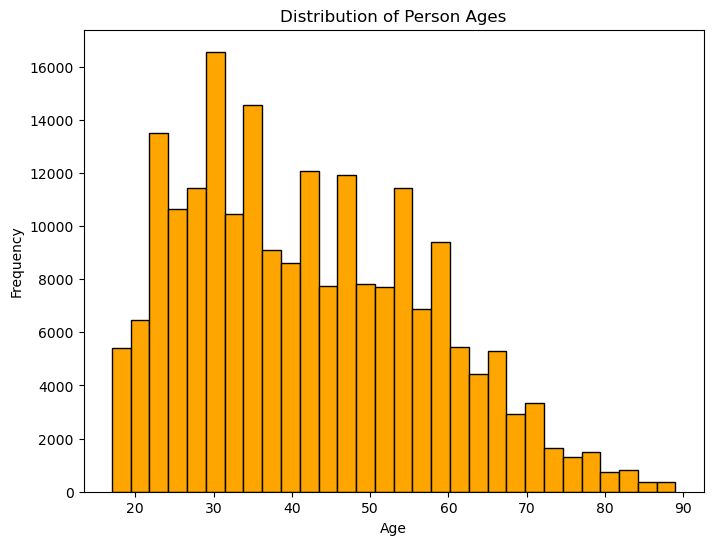

In [261]:

plt.figure(figsize=(8, 6))
plt.hist(motor_df['PERSON_AGE'], bins=30, edgecolor='black', color='orange')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Person Ages')
plt.show()



**Observation and bias:**

The histogram titled “Distribution of Person Ages” shows varying frequencies across different age groups. Notably, there are peaks in frequency at certain age intervals, particularly in the younger age groups. This suggests that there might be more individuals in the younger age range compared to older ones. However, we need to consider potential sources of bias, such as sampling bias or missing data.

**Pie Chart of Gender Distribution**

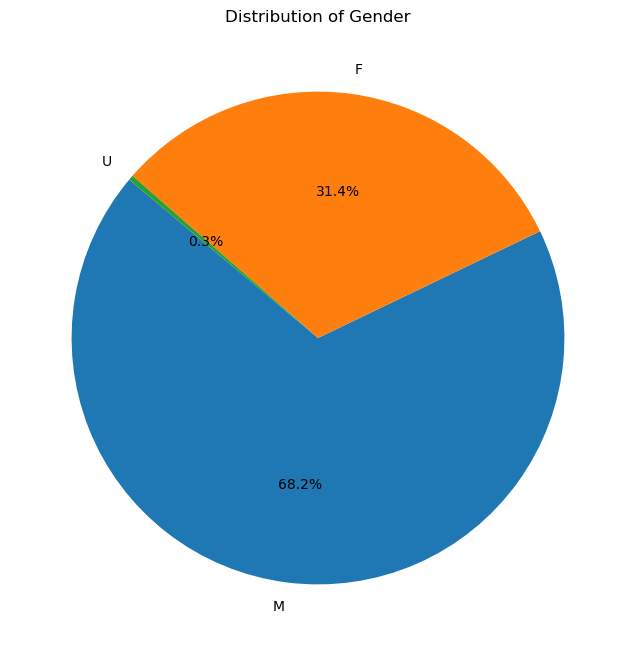

In [244]:

gender_counts = motor_df['PERSON_SEX'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Gender')
plt.show()


**Observation and bias:**

Male (M): The largest segment (68.2%) represents males (labeled as “M”). This suggests that males are the most prevalent gender in the dataset.


Female (F): The orange segment (31.4%) represents females (labeled as “F”). While smaller than the male segment, it still constitutes a significant portion of the dataset.


Other/Unknown (U): The smallest green segment (0.3%) represents individuals with an unknown or other gender category (labeled as “U”).


This pie chart provides a visual representation, but it’s essential to consider potential bias and context when 
 gender distribution

**Counting occurrences of each PED_ROLE**

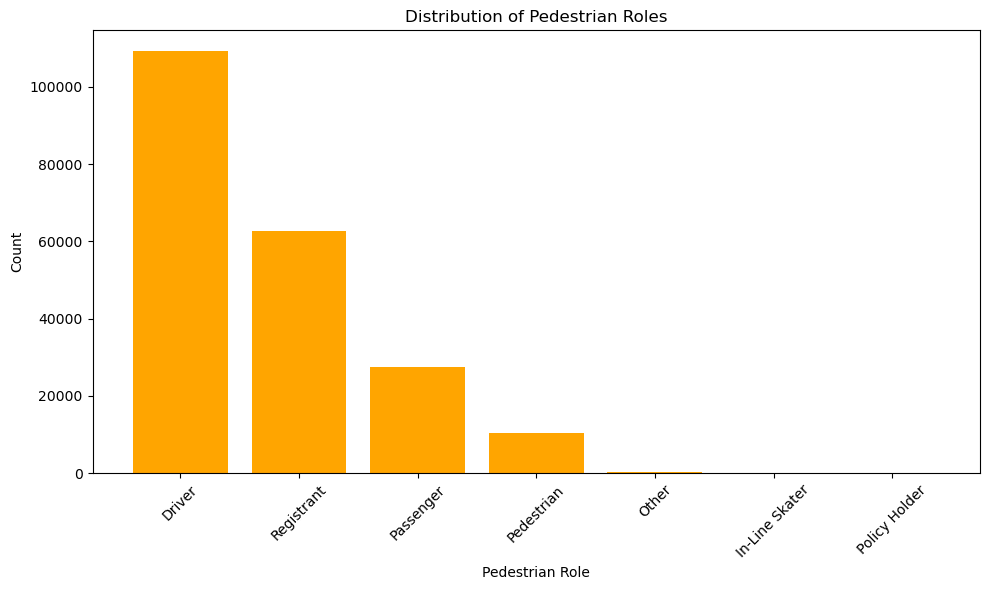

In [262]:

ped_role_counts = motor_df['PED_ROLE'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(ped_role_counts.index, ped_role_counts.values, color='orange')
plt.xlabel('Pedestrian Role')
plt.ylabel('Count')
plt.title('Distribution of Pedestrian Roles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Observation and Bias:**


**Driver:**
The ‘Driver’ category has the highest count, exceeding 80,000.
This suggests that a significant number of individuals take on the role of drivers.


**Passenger:**
The ‘Passenger’ category is the next highest, with a count around 40,000.
Passengers are common in transportation scenarios.


**Pedestrian:**
The ‘Pedestrian’ category has a lower count, near 20,000.
Pedestrians play a crucial role in road safety.


**Other Roles:**
The remaining categories (Cyclist, Motorcyclist, In-line Skater, and Policy Holder) have significantly lower counts, not exceeding 10,000.
These roles are less frequent in the dataset.

This chart provides a visual representation, and we should consider potential bias and context when interpreting these roles. 🚗🚶‍♂️🚴‍♀️

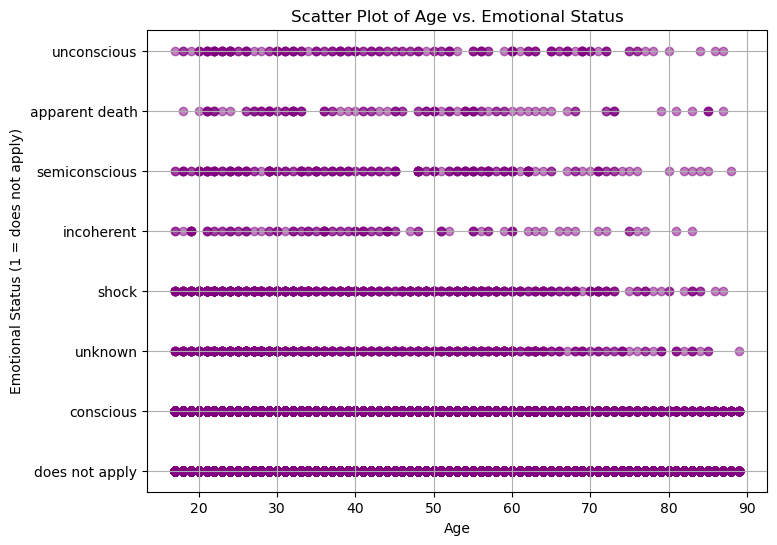

In [246]:
plt.figure(figsize=(8, 6))
plt.scatter(motor_df['PERSON_AGE'], motor_df['EMOTIONAL_STATUS'], color='purple', alpha=0.5)
plt.title('Scatter Plot of Age vs. Emotional Status')
plt.xlabel('Age')
plt.ylabel('Emotional Status (1 = does not apply)')
plt.grid(True)
plt.show()

In [247]:
motor_df.sample(5)


,UNIQUE_ID,COLLISION_ID,PERSON_ID,VEHICLE_ID,PERSON_AGE,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,POSITION_IN_VEHICLE,PED_LOCATION,...,SAFETY_EQUIPMENT_Harness,SAFETY_EQUIPMENT_Helmet (Motorcycle Only),SAFETY_EQUIPMENT_Helmet Only (In-Line Skater/Bicyclist),SAFETY_EQUIPMENT_Helmet/Other (In-Line Skater/Bicyclist),SAFETY_EQUIPMENT_Lap Belt,SAFETY_EQUIPMENT_Lap Belt & Harness,SAFETY_EQUIPMENT_Other,SAFETY_EQUIPMENT_Pads Only (In-Line Skater/Bicyclist),SAFETY_EQUIPMENT_Stoppers Only (In-Line Skater/Bicyclist),SAFETY_EQUIPMENT_Unknown
4611,10252331,4230046,81dd0c36-1595-4569-bafb-291c384151ee,19142702.0,28.0,1,does not apply,Does Not Apply,"Front passenger, if two or more persons, inclu...",Pedestrian/Bicyclist/Other Pedestrian at Inter...,...,False,False,False,False,False,True,False,False,False,False
221543,7571288,3762959,f244b368-c189-4ccf-b6c7-775c2cfd575f,17819105.0,84.0,1,does not apply,Does Not Apply,"Middle front seat, or passenger lying across a...",Pedestrian/Bicyclist/Other Pedestrian at Inter...,...,False,False,False,False,False,True,False,False,False,False
143895,7727508,3756398,5158c4a8-ac02-47ff-a8f0-e13ddfa86625,17895504.0,30.0,1,does not apply,Does Not Apply,Driver,Pedestrian/Bicyclist/Other Pedestrian at Inter...,...,False,False,False,False,False,True,False,False,False,False
108813,6573190,3473989,1129119,17336424.0,25.0,1,does not apply,Does Not Apply,Driver,Pedestrian/Bicyclist/Other Pedestrian at Inter...,...,False,False,False,False,False,True,False,False,False,False
281375,6821805,3685215,c229b151-f8dc-4fc9-9ada-3e91fefbc52d,17455734.0,31.0,1,does not apply,Does Not Apply,Driver,Pedestrian/Bicyclist/Other Pedestrian at Inter...,...,False,False,False,False,False,True,False,False,False,False


**Observations and bias**


This plot provides insights into individuals’ emotional states in a given context or study.

**Age vs. Emotional Status:**


The x-axis represents age, ranging from 0 to 90.


The y-axis shows different emotional status categories.


**Emotional Status Categories:**


Unconscious: There are purple dots concentrated along the horizontal line corresponding to this category.


Apparent Death: Similar concentration of dots.


Semiconscious: Another cluster of dots.


Shock: Visible dots.


Unknown: Some dots.


Conscious: More dots.


Does Not Apply: Few dots.


**Age-Emotional Status Relationship:**


The distribution of dots suggests that certain emotional states (e.g., unconscious, apparent death) occur more frequently within specific age ranges.


However, without additional context, we cannot draw definitive conclusions.


This scatter plot provides a visual representation, and we should consider potential bias and context when interpreting emotional status by age. 📊

# E) Modeling

**1) Choice of Predictor and Response Variables**

The predictors selected for the model are [PERSON_AGE, EMOTIONAL_STATUS, and EJECTION].

**PERSON_AGE** :is chosen because age can significantly impact how individuals experience and recover from injuries in motor vehicle collisions, with different age groups potentially exhibiting varying injury risks.

**EMOTIONAL_STATUS** :is included to account for the state of consciousness, as being conscious or unconscious can affect the severity of injuries sustained.

**EJECTION** :is a critical factor, as being ejected from a vehicle generally increases the likelihood of severe injuries. 

Together, these predictors provide a comprehensive view of the factors influencing injury outcomes, with **PERSON_INJURY** serving as the binary response variable to capture the presence or absence of injury. This setup aims to reveal how these variables contribute to the likelihood of injury in collisions.

**2) Splitting the Data into Train and Test Sets**

imports needed:

In [248]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

Note: Before splitting the data we should define a function to map 'BODILY_INJURY' to binary values

In [249]:
def map_injury_status(injury_value):
    if injury_value == 'Does Not Apply':
        return 0
    else:
        return 1
motor_df['PERSON_INJURY'] = motor_df['BODILY_INJURY'].apply(map_injury_status)    

In [250]:
predictors = ['PERSON_AGE', 'EMOTIONAL_STATUS', 'EJECTION']

# Define predictors and response variables
X = motor_df[predictors]
y = motor_df['PERSON_INJURY']


Now splitting the data


In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Identify non_numeric columns then convert to numeric

In [252]:
# Identify 
non_numeric_columns = X_train.select_dtypes(include=['object']).columns

# Convert 
for col in non_numeric_columns:
    if 'does not apply' in X_train[col].unique():
        X_train[col] = X_train[col].replace('does not apply', np.nan)
        X_test[col] = X_test[col].replace('does not apply', np.nan)
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))


**3) Scaling the training data**


In [253]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**4) Fitting the model on the training data**

**I- Linear Regression**

In [254]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

**5) Scale the x_test data & Predict on the test set**

In [255]:
x_test_s = scaler.transform(X_test)
y_test_predicted = model.predict(x_test_s)

**6) Compute R-squared**

In [256]:
r2 = r2_score(y_test, y_test_predicted)
print(f'R-squared: {r2}')

R-squared: 0.6216246734307065


**7) Fitting description**

- **R-squared (0.62):** This value suggests that about **62%** of the variance in the response variable (`PERSON_INJURY`) is explained by the predictor variables (`PERSON_AGE`, `EMOTIONAL_STATUS`, and `EJECTION`). 


- **Explanation :** The predictors used in the model are effective in capturing the relationship with the response variable.

- **Model Effectiveness:** With an R-squared of 0.62, the model provides a good representation of the underlying data, suggesting that the selected predictors are relevant and contribute significantly to explaining injury likelihood.

**II- Random Forest**

**Why We Use the Random Forest Regressor**

Random Forest model can handle more complex relationships and interactions in the dataset compared to Linear Regression.
This method helps capture detailed patterns in the data.

In [257]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train_scaled, y_train)

y_test_predicted_rf = rf_model.predict(X_test_scaled)

# This metric measures the proportion of variance in the dependent variable that is predictable from the independent variables
r2_rf = r2_score(y_test, y_test_predicted_rf)

print(f'Random Forest R-squared: {r2_rf}')


Random Forest R-squared: 0.9169185989110737


**III- Support Vector Regressor (SVR)**

**Why We Use the Support Vector Regressor**

We use the Support Vector Regressor (SVR) because it is effective for finding complex patterns in data. It helps in making accurate predictions by creating a clear boundary between different data points, even when the relationships are not straightforward.


In [258]:
from sklearn.svm import SVR

# Train and evaluate Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
y_test_predicted_svr = svr_model.predict(X_test_scaled)

# Calculate performance metrics
r2_svr = r2_score(y_test, y_test_predicted_svr)

print(f'Support Vector Regression R-squared: {r2_svr}')


Support Vector Regression R-squared: 0.8259530306713518


**IV- Huber Regressor**

**Why Use the Huber Regressor?**

We use the Huber Regressor because it works well with data that has outliers, like our collision data. It helps the model make accurate predictions even when some data points are unusual or extreme.



In [259]:
from sklearn.linear_model import HuberRegressor

# Train and evaluate Huber Regressor
huber_model = HuberRegressor()
huber_model.fit(X_train_scaled, y_train)
y_test_predicted_huber = huber_model.predict(X_test_scaled)

# Calculate performance metrics
r2_huber = r2_score(y_test, y_test_predicted_huber)

print(f'Huber Regressor R-squared: {r2_huber}')



Huber Regressor R-squared: 0.5294716635464727


**Summary**

In [260]:
import statsmodels.api as sm 
X=sm.add_constant(X_train_scaled)
results = sm.OLS(y_train , X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          PERSON_INJURY   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                 7.951e+04
Date:                Mon, 29 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:10:57   Log-Likelihood:                 31784.
No. Observations:              167920   AIC:                        -6.356e+04
Df Residuals:                  167916   BIC:                        -6.352e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1089      0.000    222.894      0.0